# **Importing Library**




In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# ***EDA***

In [6]:
df.shape

(4177, 9)

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.describe(include=['O'])

,Sex
count,4177
unique,3
top,M
freq,1528


## **checking null value**

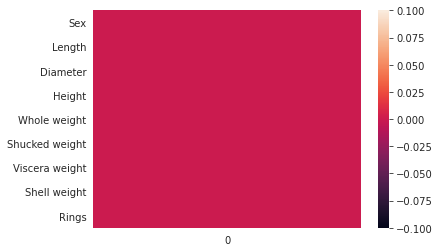

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No NULL value in dataset

## **Data Formatting**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All feature is of categorical format

## **Visualization**

In [ ]:
cat=['Sex']
num=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [ ]:
import scipy.stats as stat
import pylab 

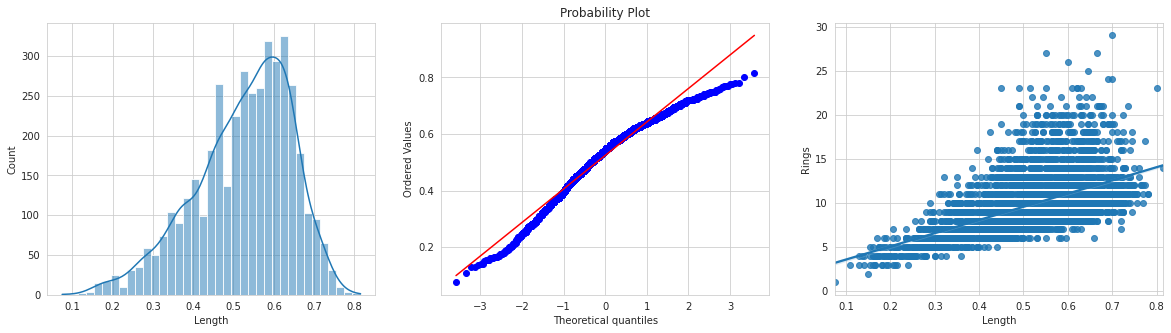

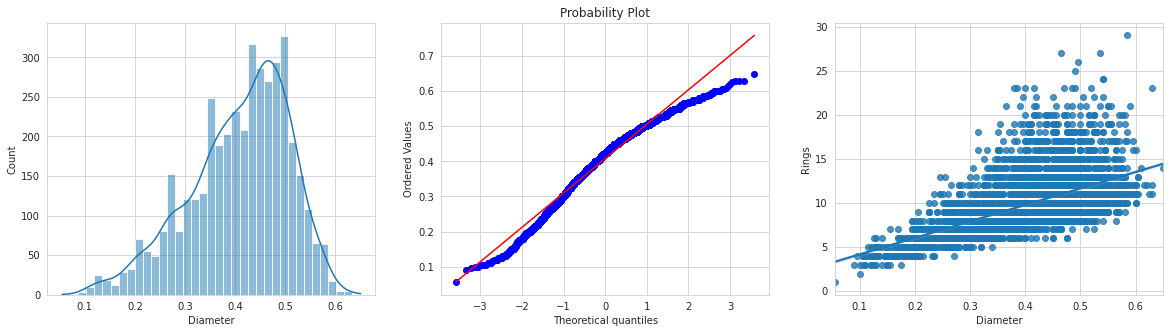

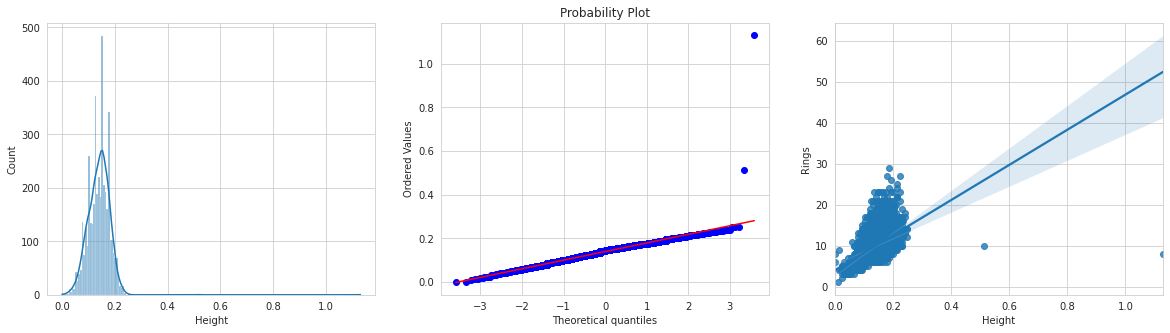

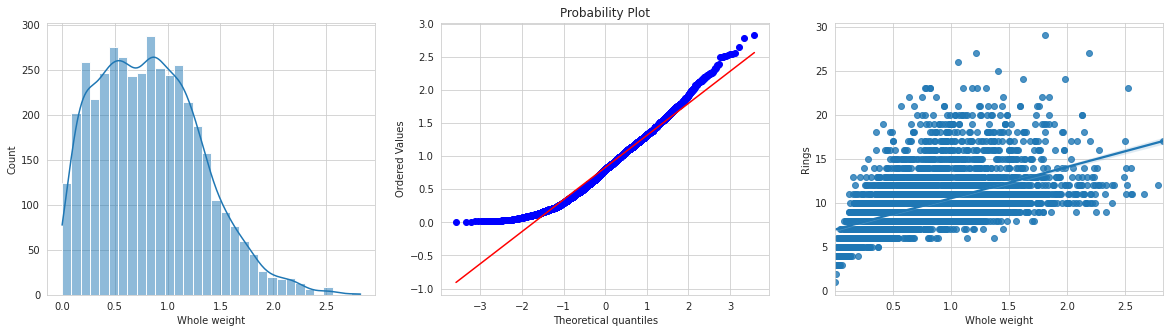

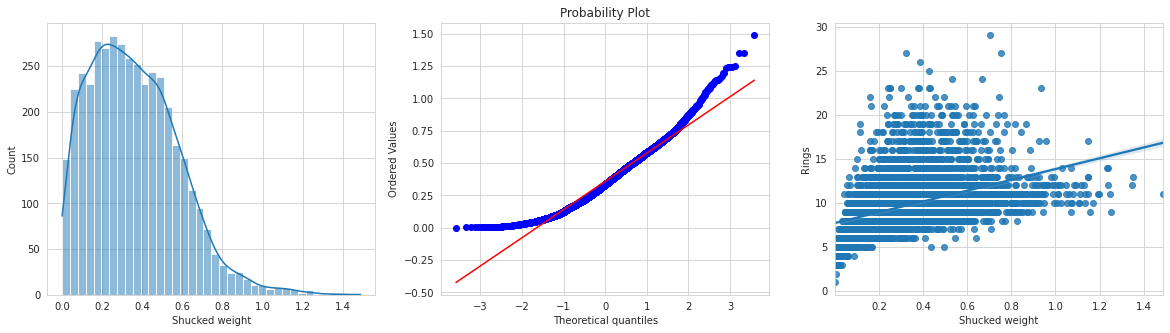

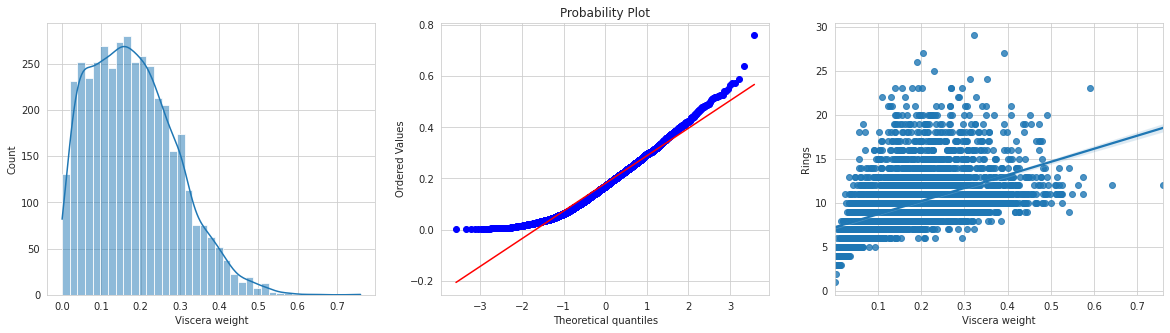

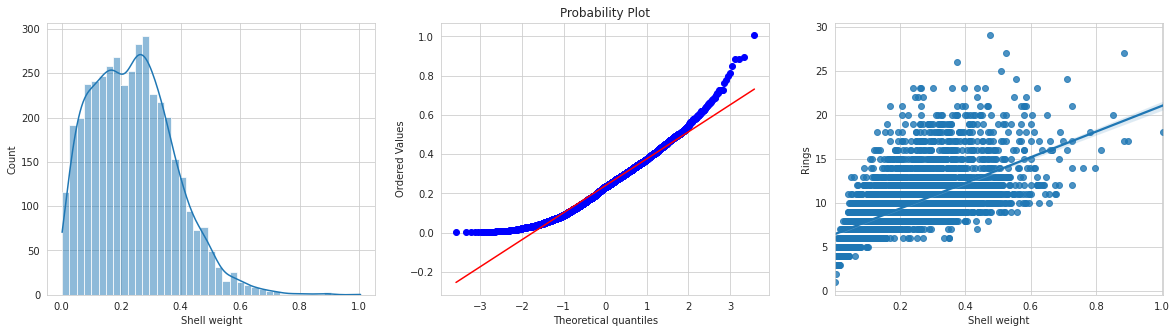

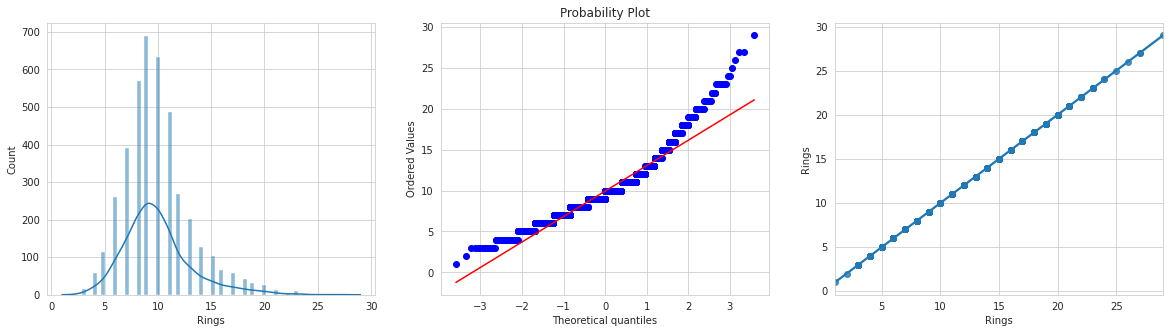

In [ ]:
for i in num:
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.regplot(x=i,y='Rings',data=df)
  
  plt.show()

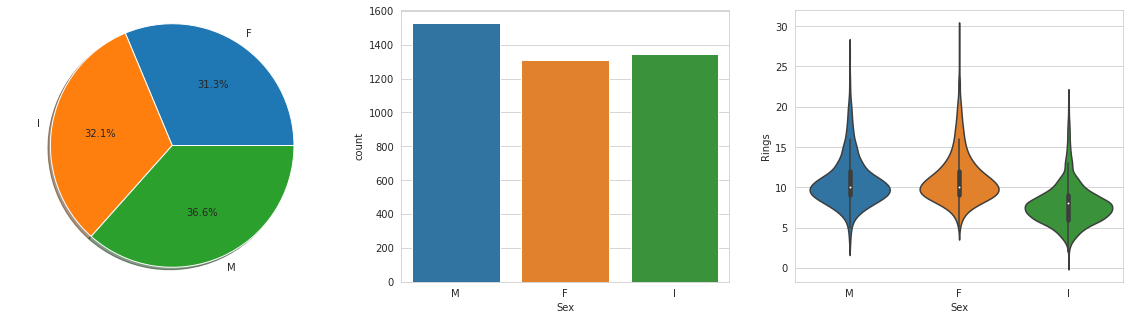

In [ ]:

for i in cat:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  sns.violinplot(x=i,y='Rings',data=df,ax=ax3)
  plt.show()



1.   Male , female and infate have almost same data, no of rings in female>male>infant 

2.   All of the numarical variable are correlated with the output Rings






In [ ]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in df[num].columns:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=num)


In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

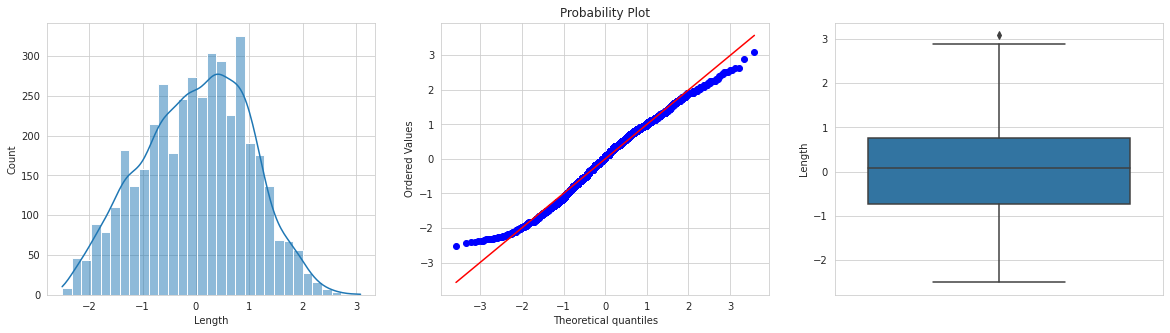

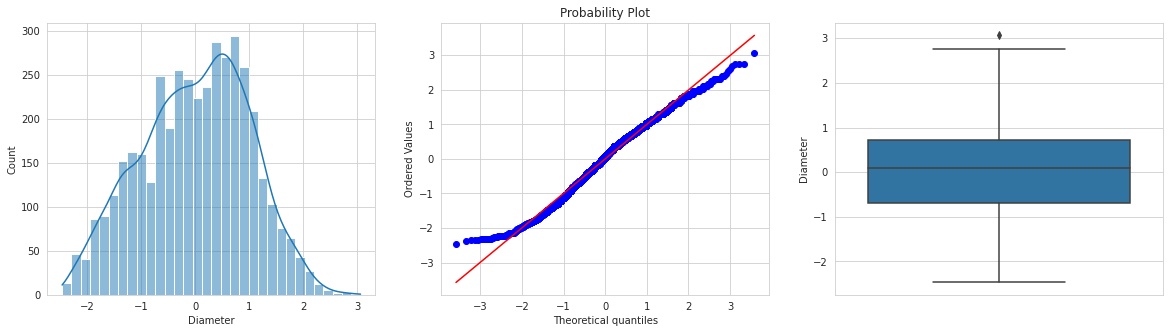

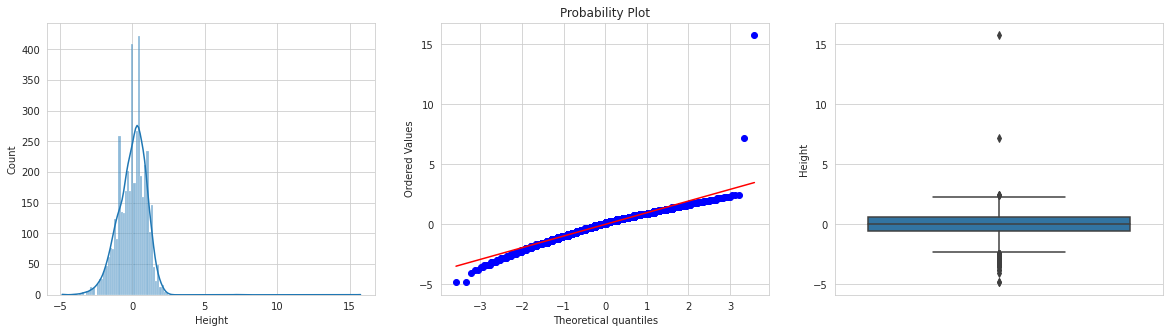

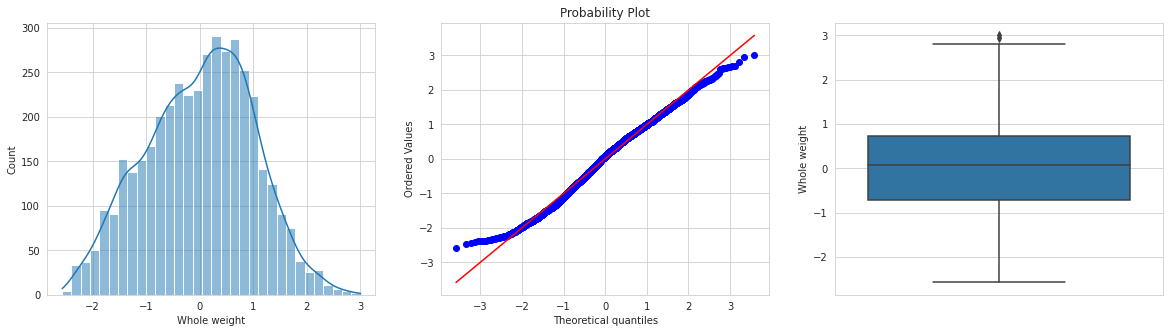

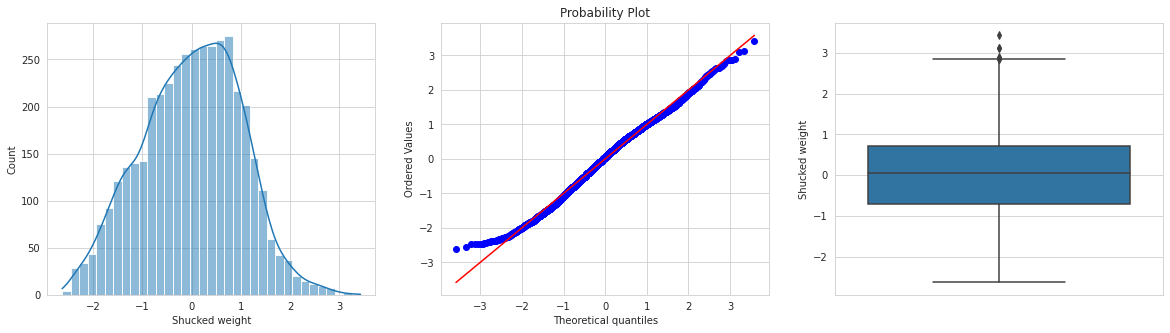

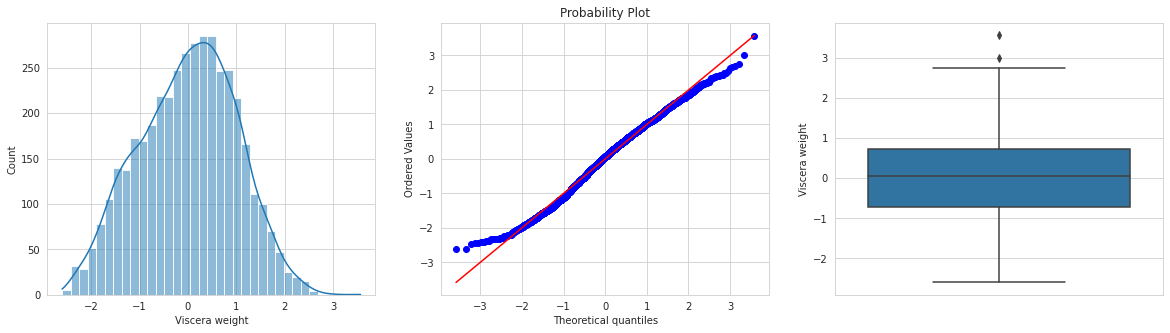

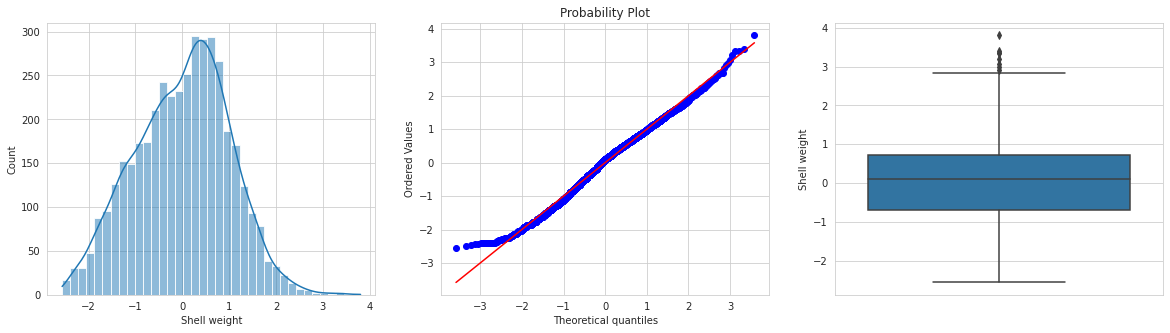

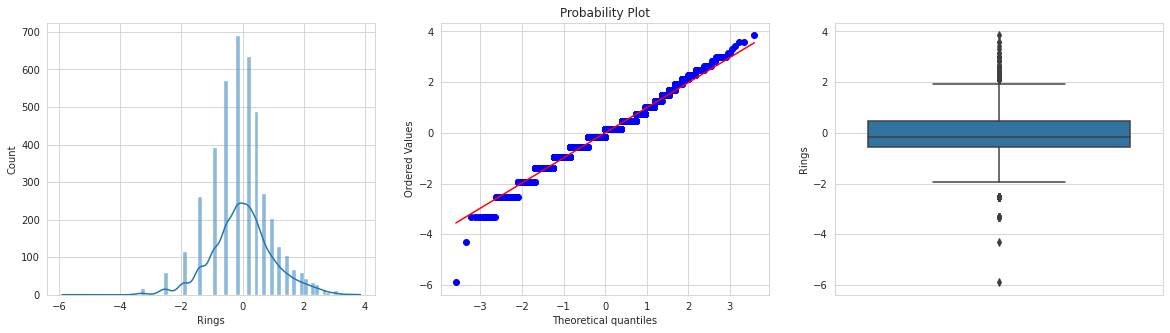

In [ ]:
pt1=pd.DataFrame(pt1,columns=df[num].columns)
#pd.concat([pt1,df.quality],axis=1)
for i in df[num].columns:
  pplot(pt1,i)

Data filtering:-

In [ ]:
x=df.drop('Rings',axis=1)
y=df['Rings']

## **Encoding**:- categories are encoded according to the percentage of value represents edible class (percentage encoding)

In [ ]:
df['Sex_enc']=df['Sex'].map({'I':0,'M':1,'F':2})
df.drop('Sex',axis=1,inplace=True)

In [ ]:
pt1=pd.concat([pd.DataFrame(pt1),df['Sex_enc']],axis=1)

In [ ]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_enc
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


## **Correlation**

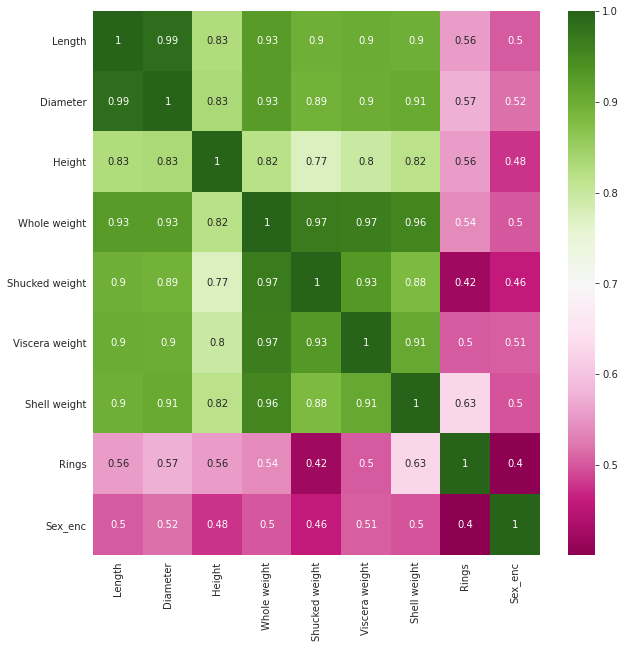

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

Multicoliniarity exists 

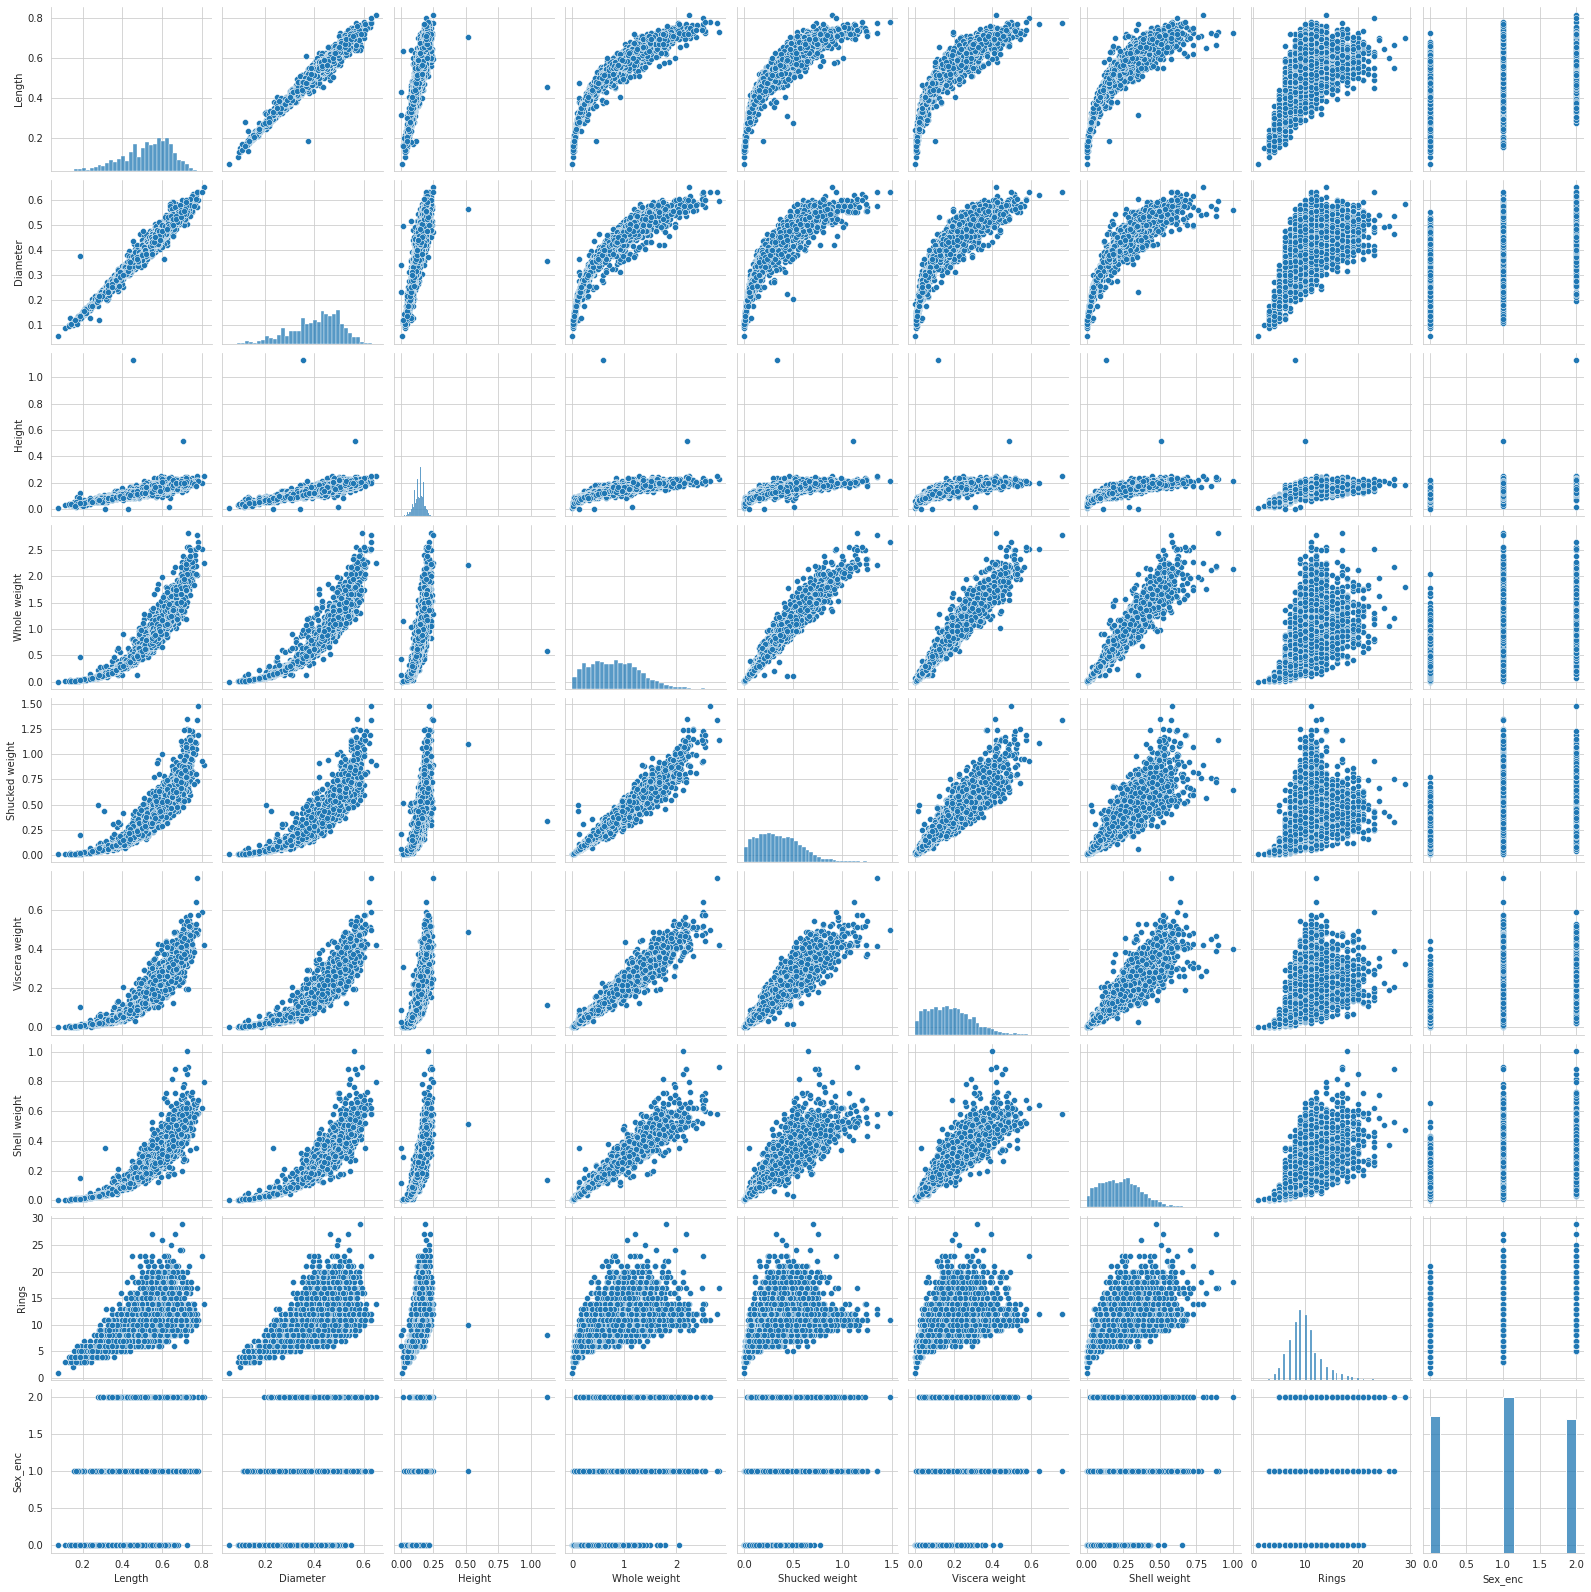

In [ ]:
sns.pairplot(df)

## **Anova test**

In [ ]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

s=SelectKBest(f_classif,k=8).fit(x,y)

s.fit(x,y)

SelectKBest(k=8, score_func=<function f_classif at 0x7fe29951e710>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
Sex_enc,51.863221,6.010322e-238
Shucked weight,80.797677,0.000000e+00
Viscera weight,103.721438,0.000000e+00
Whole weight,113.712340,0.000000e+00
Height,124.427714,0.000000e+00
Shell weight,147.236946,0.000000e+00
Length,188.509425,0.000000e+00
Diameter,196.436105,0.000000e+00


 All P value is smaller then 0.05 therefore every feature is related to class. 

## **Spliting data**

In [ ]:
x=pt1.drop('Rings',axis=1)
y=pt1['Rings']

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=142)

In [ ]:
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Rings',axis=1)
  y_z=df_z.Rings
  return(x_z,y_z)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.9866985900505454


In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [ ]:
x_scaler=pd.concat([pd.DataFrame(x_train_scaler),pd.DataFrame(x_test_scaler)],axis=0)

In [ ]:
y_scaler=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)],axis=0)

# **Model Evaluation**

## **Linear Regression**(0.47)

In [ ]:
from sklearn.linear_model import LinearRegression as LR
clf_lr = LR().fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


0.5947649982817245
0.4631387999363925


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10)

cv_results['test_score'].mean()



0.4756243225098508

## **Random Forest Regressor**(0.53)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
clf_rfc = RandomForestRegressor(random_state=42).fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6122808484614105
0.44312011991692773


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RandomForestRegressor(), x, y, cv=10)

cv_results['test_score'].mean()


0.5389785494744015

## **XGB Regressor**(0.55)

In [ ]:
from xgboost import XGBRegressor as XBR
xgc=XBR().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


[16:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6172666446041803
0.4374219062076016


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=10)

cv_results['test_score'].mean()




[16:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.5560649266454467

## **Ada Boost Regressor**(0.31)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor as ABR 
abc=ABR().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6172666446041803
0.4374219062076016


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABR(), x, y, cv=10)

cv_results['test_score'].mean()



0.3160362324800818

## **Extra Tree Regressor**(0.53)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor as ETR 

etc = ETR(random_state=123)
etc.fit(x_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


0.6626541901475503
0.3646774380242588


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(random_state=123), x, y, cv=10)

cv_results['test_score'].mean()


0.529768271822571

## **Support vector regressor**(0.58)



In [ ]:
from sklearn.svm import SVR
clf_svr = SVR().fit(x_train_scaler, y_train)
y_pred=clf_svr.predict(x_test_scaler)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


0.6382122896520759
0.41348334988782925


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(), x, y, cv=10)

cv_results['test_score'].mean()

0.58578281171431

# **Hyper-parameter tuning** 

## **Random Forest**(0.62)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25,50,75,100], 'max_features': [2,3,4,5], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RFR(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_search_forest.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 4, 'n_estimators': 100}

In [ ]:
rfr=grid_search_forest.best_estimator_
#rfr=RFR(bootstrap=True, max_depth= 10, max_features= 4, n_estimators= 100).fit(x_train,y_train)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6199716140293271
0.43433042524441945


## **Support vector regressor**(0.64)

In [ ]:
x_scaler.shape

(4127, 8)

In [ ]:
param_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.1,0.5,1,2,5]}

grid_search_sv = GridSearchCV(SVR(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_sv.fit(x_scaler, y_scaler)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search_sv.best_params_

{'C': 2, 'kernel': 'rbf'}

In [ ]:
svr=grid_search_sv.best_estimator_
#svr=SVR(C=5).fit(x_train,y_train)
svr.fit(x_train_scaler, y_train)
y_pred=svr.predict(x_test_scaler)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6403292711106463
0.4110638741563336


# **Best Model Evaluation**(0.62)

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=2), x_scaler, y_scaler, cv=10)

cv_results['test_score'].mean()

0.6226118204502289

In [ ]:
svr=SVR(C=2).fit(ss.transform(x), y)

# **Saving the model** 

In [ ]:
import pickle

filename = '/content/drive/MyDrive/datatrained/abalone pred/svr.sav'
pickle.dump(svr, open(filename, 'wb'))

# **Conclusion**

In [ ]:

filename = '/content/drive/MyDrive/datatrained/abalone pred/svr.sav'
svr = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred=svr.predict(x_test_scaler)

In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176
0,-1.038589,-0.660741,-0.040857,0.021907,-0.355472,-0.661829,-0.864910,-0.862262,-0.055529,-1.508849,0.092419,-1.164739,0.161257,0.210573,0.095585,-0.585545,0.224377,0.259634,-0.035632,1.136387,0.297722,0.450298,-0.094691,0.302258,-0.154232,-0.094516,-1.358987,-1.073693,0.524693,0.530614,-1.019981,1.298110,-0.285737,0.348014,-0.316710,0.294963,-0.659296,0.040347,0.759515,0.586488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rings,1.482703,-0.944729,-0.178284,0.152765,-0.944729,-0.541512,2.482631,1.702852,-0.178284,2.300796,1.249978,0.152765,0.457312,0.152765,0.152765,0.739620,-0.944729,0.152765,-0.944729,-0.178284,0.457312,0.152765,0.739620,-0.178284,0.152765,0.457312,0.457312,0.739620,1.482703,0.457312,0.152765,1.482703,2.110813,2.300796,1.002978,-0.541512,1.702852,-0.541512,0.457312,-0.178284,...,0.457312,0.457312,0.152765,0.152765,0.457312,1.002978,1.002978,0.457312,0.457312,0.152765,0.457312,0.457312,-1.399127,-0.944729,-1.399127,-0.944729,-0.541512,-1.399127,-1.399127,-0.541512,-0.541512,-0.541512,-0.178284,0.457312,0.457312,-0.541512,-0.944729,-0.944729,-0.944729,0.152765,-0.178284,-0.541512,0.152765,0.152765,-0.541512,0.457312,0.152765,-0.178284,0.152765,0.73962


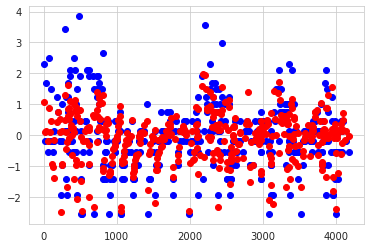

In [ ]:
plt.scatter(y_test.index,y_test,color='blue')
plt.scatter(y_test.index,y_pred,color='red')

In [ ]:
error=y_pred-y_test

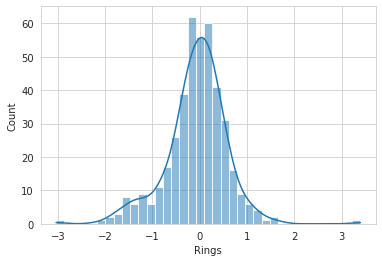

In [ ]:
sns.histplot(error,kde=True)